<a href="https://colab.research.google.com/github/roberthsu2003/machine_learning/blob/main/%E4%B8%8A%E8%AA%B2%E5%85%A7%E5%AE%B9/2025_06_20_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%%capture
%pip install wget

In [6]:
import wget

wget.download("https://github.com/roberthsu2003/machine_learning/raw/refs/heads/main/source_data/ChineseFont.ttf")


'ChineseFont (1).ttf'

In [7]:
## 取行數據資料
import numpy as np

data = np.genfromtxt('Salary_Data.csv', delimiter=',',skip_header=1,dtype=float)
np.shape(data)

(30, 2)

In [8]:
X_salary = data[:,0]
y_salary = data[:,1]

In [26]:
X_salary1 = X_salary.reshape((-1,1))

In [16]:
!pip install -U scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 50.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.


In [22]:
from sklearn.linear_model import LinearRegression

In [27]:
#建立模型
#訓練模型
model = LinearRegression()
model.fit(X_salary1,y_salary)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [31]:
w = model.coef_[0]
b = model.intercept_
print(f"\n線性迴歸模型:")
print(f"權重 (Coefficient): {w:.2f}")
print(f"偏差 (Intercept): {b:.2f}")



線性迴歸模型:
權重 (Coefficient): 9449.96
偏差 (Intercept): 25792.20


In [38]:
#進行預測
X_test_points = np.array([[0], [5], [10], [12]])

y_pred = model.predict(X_test_points)
print(y_pred)
print("\n對新的年資點進行預測:")
for i in range(len(X_test_points)):
  print(f"年資:{X_test_points[i,0]}年 -> 預測薪資:{y_pred[i]:.2f}")



[ 25792.20019867  73042.01180594 120291.82341322 139191.74805613]

對新的年資點進行預測:
年資:0年 -> 預測薪資:25792.20
年資:5年 -> 預測薪資:73042.01
年資:10年 -> 預測薪資:120291.82
年資:12年 -> 預測薪資:139191.75


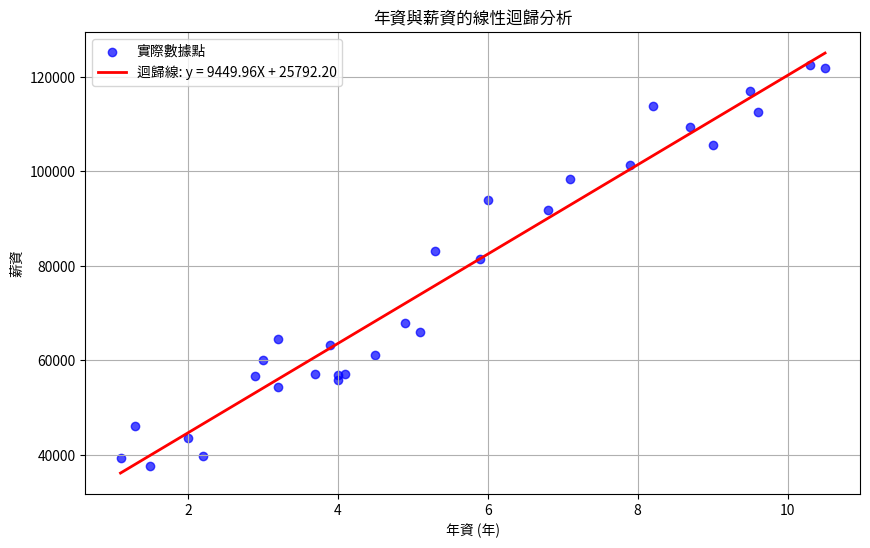

In [52]:
#使用 Matplotlib 視覺化數據點和迴歸線
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

plt.figure(figsize=(10, 6))
plt.scatter(X_salary, y_salary, color='blue', alpha=0.7, label='實際數據點')

# 繪製迴歸線
x_fit = np.linspace(X_salary.min(), X_salary.max(), 100).reshape(-1, 1)
#print(np.linspace(X_salary.min(), X_salary.max(), 100).reshape(-1,1).shape)

y_fit = model.predict(x_fit)
#print(y_fit.shape)
plt.plot(x_fit.flatten(), y_fit, color='red', linewidth=2, label=f'迴歸線: y = {w:.2f}X + {b:.2f}')

plt.title('年資與薪資的線性迴歸分析')
plt.xlabel('年資 (年)')
plt.ylabel('薪資')
plt.legend()
plt.grid(True)
plt.show()